# **Computational Methods**
## **Class Work**
### **Interpolation**
written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
1. Import the `pyplot` and `numpy` libraries.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6.67]

2. Load and plot The file *EQ-4.6-IS.STLI..SHZ.npy.*  
The file contains a seismogram, eight seconds of a 4.6 magnitude earthquake trace from as recived in the Sal'it seismic station at 04/07/2018.  
The trace is the recorded ground speed with a frequancy of 40 [Hz] (1 / 40 [s]).  
**Dont forget to add axis labels and title.**

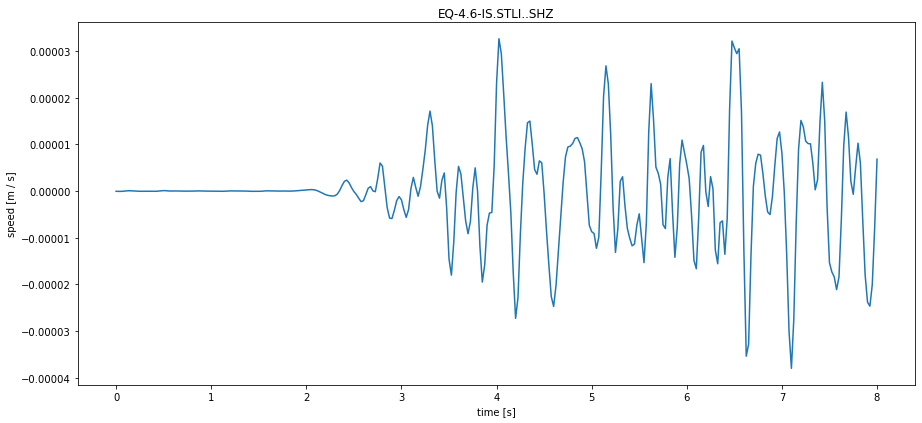

In [24]:
trace = np.load("../../EQ-4.6-IS.STLI..SHZ.npy")
t = np.arange(trace.shape[0]) / 40
plt.xlabel("time [s]")
plt.ylabel("speed [m / s]")
plt.title("EQ-4.6-IS.STLI..SHZ")
plt.plot(t, trace)
plt.show()

3. Find the PGV(Peak Ground Velocity) of the seimogram and the time of the peak (in seconds).

In [25]:
trace_abs = np.abs(trace)
pgv = trace_abs.max()
t_pgv = t[trace_abs.argmax()]
pgv, t_pgv

(3.8009788719601716e-05, 7.1)

We want to learn the differences between the different interpolations.  
First we will downsample the trace to 20 [Hz] (this is just an example, in reality down sampleing is done differently)

In [60]:
t20 = t[1: : 2]
trace20 = trace[1: : 2]

4. Use linear and spline(cubic & quadratic) interpolations on the seismograms data.

In [61]:
from scipy.interpolate import interp1d

In [62]:
f_linear = interp1d(x=t20, y=trace20, kind='linear')
f_cubic = interp1d(x=t20, y=trace20, kind='cubic')
f_quadratic = interp1d(x=t20, y=trace20, kind='quadratic')

5. plot all 3 interpolations on the same plot

Try to find the differences between the different interpolations. 

In [59]:
%matplotlib auto
t1 = np.arange(trace.shape[0] * 2 - 1) / 80
plt.xlabel("time [s]")
plt.ylabel("speed [m / s]")
plt.title("EQ-4.6-IS.STLI..SHZ")
plt.plot(t, trace)
plt.plot(t[1:-2], f_linear(t[1:-2]), '--', label='linear')
plt.plot(t[1:-2], f_cubic(t[1:-2]), '--', label='cubic')
plt.plot(t[1:-2], f_quadratic(t[1:-2]), '--', label='cubic')
plt.legend()
plt.show()

Using matplotlib backend: Qt5Agg
